In [2]:
import numpy as np
import matplotlib.pyplot as plt
from os import chdir
chdir('/Users/samgabe/Documents/University/Project')

## Read halo mass function

z = 4.2


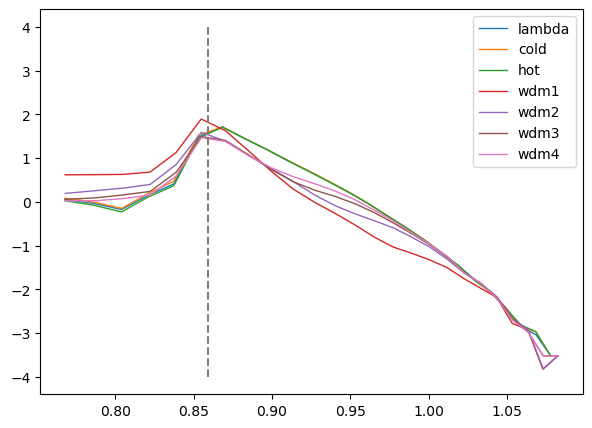

z = 4.8


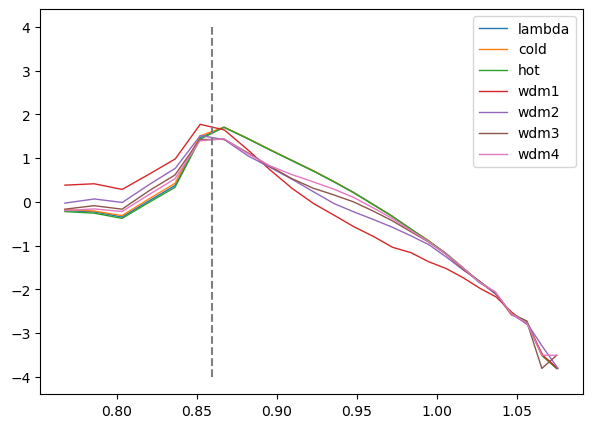

z = 5.4


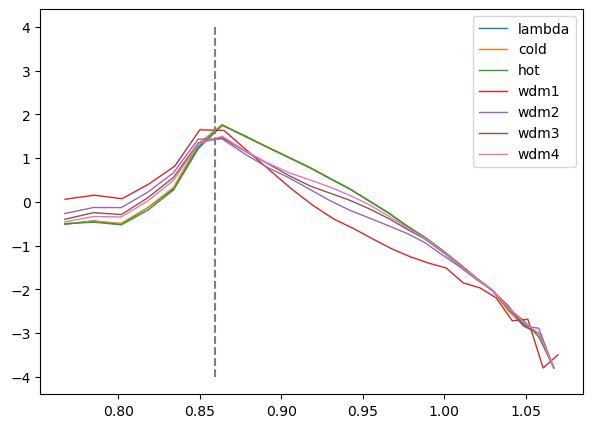

z = 6.0


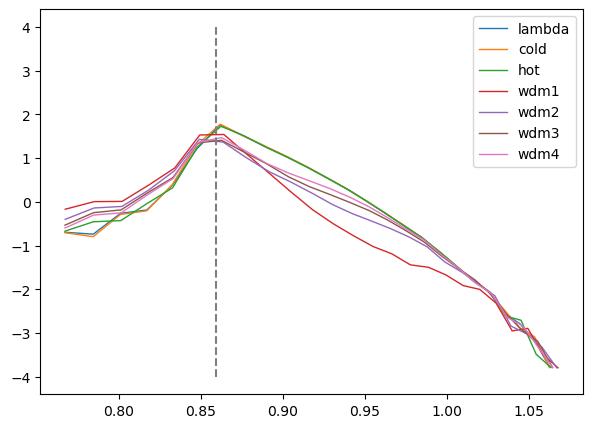

z = 7.0


/Users/samgabe/opt/anaconda3/envs/uni/lib/python3.7/site-packages/ipykernel_launcher.py:62: RuntimeWarning: divide by zero encountered in log10


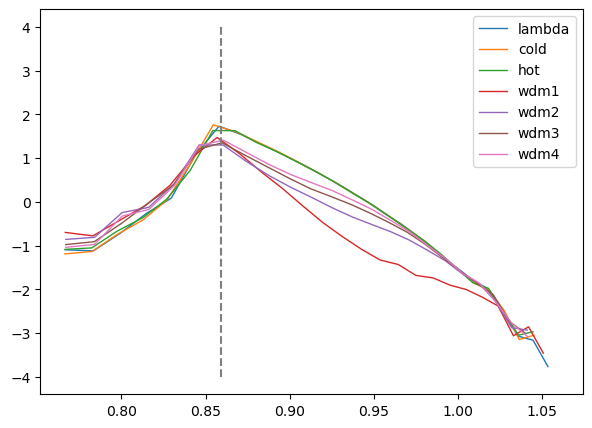

z = 8.0


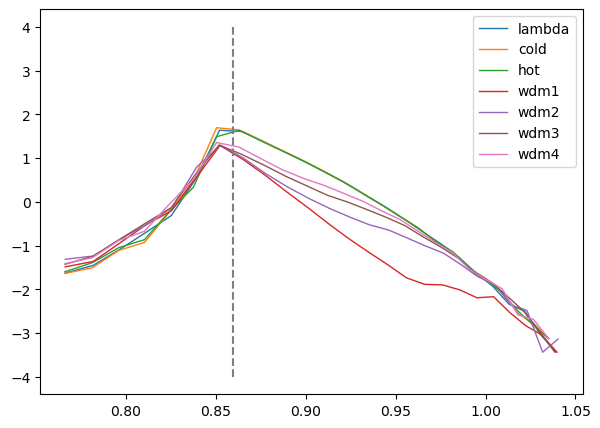

z = 10.0


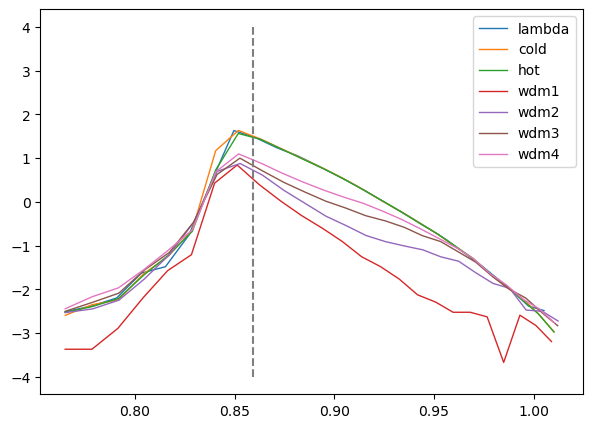

In [3]:
h        = 0.678                # H0/100 km/s/Mpc
Lbox     = 20000.0 / h          # box size in ckpc/h
mdm_part = 5.37e5               # dm particle mass in Msol/h

def calc_hmf(dmm, z):
    file = f'Data.nosync/planck1_20_1024_{dmm}/halolist_z{z:.3f}.dat'

    # Open the binary file
    readdata = open(file,"rb")

    # Header data
    ngroups = np.fromfile(readdata,dtype=np.int32,count=1)  # number of FoF groups (haloes)

    CMx    = np.fromfile(readdata, dtype=np.float32, count=ngroups[0]) # x-coordinate halo centre of mass, comoving kpc/h
    CMy    = np.fromfile(readdata, dtype=np.float32, count=ngroups[0]) # y-coordinate halo centre of mass, comoving kpc/h
    CMz    = np.fromfile(readdata, dtype=np.float32, count=ngroups[0]) # z-coordinate halo centre of mass, comoving kpc/h
    Mgas   = np.fromfile(readdata, dtype=np.float32, count=ngroups[0]) # gas mass, Msol/h
    Mdm    = np.fromfile(readdata, dtype=np.float32, count=ngroups[0]) # dark matter mass, Msol/h
    Mstars = np.fromfile(readdata, dtype=np.float32, count=ngroups[0]) # stellar mass, Msol/h

    readdata.close()

    CMr = np.sqrt(CMx*CMx + CMy*CMy + CMz*CMz)

    # print('Total groups:',ngroups[0])

    mass_limit = np.log10(32.0 * mdm_part)
    ind = np.where(np.log10(Mdm) >= mass_limit)

    # print('Total resolved groups:', len(Mdm[ind]))

    # Compute and plot dark matter halo mass function
    nbins    = 25
    binmin   = np.log10(np.min(Mdm))
    binmax   = np.log10(np.max(Mdm))
    binsize  = (binmax - binmin) / nbins

    massfn,mbin_edge = np.histogram(np.log10(Mdm), bins=np.linspace(binmin,binmax,nbins+1))

    # Calculate bin centres and normalise the distribution
    mbin   = binmin + np.linspace(0,nbins-1,nbins)*binsize + 0.5*binsize
    massfn = massfn / (binsize*(Lbox/1.0e3)**3.0)
    
    return mbin, massfn, mass_limit

# Z array is defined by files. dmm is in each filename
dmmlist = ['lambda', 'cold', 'hot', 'wdm1', 'wdm2', 'wdm3', 'wdm4']
zarr    = np.array([4.200, 4.800, 5.400, 6.000, 7.000, 8.000, 10.000])
stem    = 'Data.nosync/Halo mass data/'
zlist = [4.200, 4.800, 5.400, 6.000, 7.000, 8.000, 10.000]

mass_limit = 0

for z in zlist:
    print('z =', z)
    plt.figure(figsize=(7, 5))
    # Save different file for each dark matter model (dmm)
    for dmm in dmmlist:
        mbin, massfn, mass_limit = calc_hmf(dmm, z)                            # Create halo mass array
        # data = np.array([zarr, MHarr])                                                  # Package up to be saved in a txt file
        # np.save(stem + dmm, data)
        plt.plot(np.log10(mbin), np.log10(massfn), label=dmm, linewidth=1.0)

    plt.plot(np.log10([mass_limit,mass_limit]), [-4,4], '--')
    plt.legend()
    # plt.savefig(f'Graphs/Halo Mass Function/z={z}.jpg')

    plt.show()


## $\dot{n}_{\gamma}$

In [4]:
MPc = 3.0857E+22

# Read in data for z = 6
dmm = 'lambda'
z = 6.0
file = f'Data.nosync/planck1_20_1024_{dmm}/halolist_z{z:.3f}.dat'

# Open the binary file
readdata = open(file,"rb")

h = 0.678

# Read in data
ngroups = np.fromfile(readdata,dtype=np.int32,count=1)  # number of FoF groups (haloes)

CMx    = np.fromfile(readdata, dtype=np.float32, count=ngroups[0]) # x-coordinate halo centre of mass, comoving kpc/h
CMy    = np.fromfile(readdata, dtype=np.float32, count=ngroups[0]) # y-coordinate halo centre of mass, comoving kpc/h
CMz    = np.fromfile(readdata, dtype=np.float32, count=ngroups[0]) # z-coordinate halo centre of mass, comoving kpc/h
Mgas   = np.fromfile(readdata, dtype=np.float32, count=ngroups[0]) # gas mass, Msol/h
Mdm    = np.fromfile(readdata, dtype=np.float32, count=ngroups[0]) # dark matter mass, Msol/h
Mstars = np.fromfile(readdata, dtype=np.float32, count=ngroups[0]) # stellar mass, Msol/h

readdata.close()

sum_masses = np.sum(Mdm) / h# * (2e30)

# ndot gamma
nion_filename = 'Data.nosync/Ndotion data/nion_kulkarni.txt'
nion = np.loadtxt(nion_filename)
nion6_idx = np.abs(nion[:, 0] - 6.0).argmin()
nion6 = nion[nion6_idx, 1]# / MPc**3

# volume of box = length cubed
vbox = Lbox ** 3
zeta = nion6 * vbox / sum_masses

# Constant n ion
nion_const = 3E50# / MPc**3
zeta_nionconst = nion_const * vbox / sum_masses

print(f'nion(z=6) = {nion6}')
print(f'zeta = {zeta}')
print(f'zeta with nion 3e50 = {zeta_nionconst}')

nion(z=6) = 4.813987420005469e+50
zeta = 1.0747653118329739e+50
zeta with nion 3e50 = 6.697765603000389e+49


## Now build $\dot{n}_{ion}$
$\dot{n}_{ion} = \frac{\zeta\Sigma_i M^i}{V_{box}}$

1. Open data
2. Calculate $\dot{n}_{ion}$ for each value of $z$
3. Plot $\dot{n}_{ion}$ for different dark matter models and compare to the data from the text file.

Different because we have constant zeta

Lambda model, z = 6: nion = 4.813987420005469e+50
Matches above


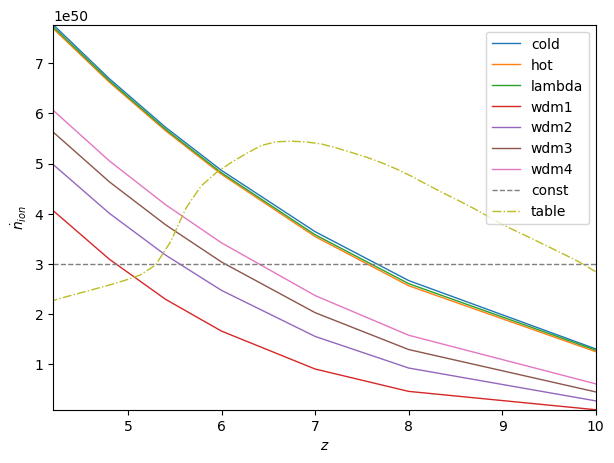

In [10]:
fig = plt.figure(figsize=(7, 5))
plt.xlim(4.2, 10.0)
plt.ylim(4e50, 4.1e50)

dmmlist = ['cold', 'hot', 'lambda', 'wdm1', 'wdm2', 'wdm3', 'wdm4']
zarr = np.array([4.200, 4.800, 5.400, 6.000, 7.000, 8.000, 10.000])
zetaout = 1.0747653118329739e+50

for dmm in dmmlist:
    nionarr = np.zeros_like(zarr)
    for i, z in enumerate(zarr):
        filename = f'Data.nosync/planck1_20_1024_{dmm}/halolist_z{z:.3f}.dat'
        
        #region Open data
        readdata = open(filename, "rb")

        # Read in data
        ngroups = np.fromfile(readdata,dtype=np.int32,count=1)  # number of FoF groups (haloes)

        CMx    = np.fromfile(readdata, dtype=np.float32, count=ngroups[0]) # x-coordinate halo centre of mass, comoving kpc/h
        CMy    = np.fromfile(readdata, dtype=np.float32, count=ngroups[0]) # y-coordinate halo centre of mass, comoving kpc/h
        CMz    = np.fromfile(readdata, dtype=np.float32, count=ngroups[0]) # z-coordinate halo centre of mass, comoving kpc/h
        Mgas   = np.fromfile(readdata, dtype=np.float32, count=ngroups[0]) # gas mass, Msol/h
        Mdm    = np.fromfile(readdata, dtype=np.float32, count=ngroups[0]) # dark matter mass, Msol/h
        Mstars = np.fromfile(readdata, dtype=np.float32, count=ngroups[0]) # stellar mass, Msol/h

        readdata.close()
        #endregion

        sum_masses = np.sum(Mdm) / h# * 2e30

        # Calculate nion
        nionarr[i] = zetaout * sum_masses / vbox
    
    # This basically removes the margins from the y limits on the graph.
    plt.ylim(min(plt.ylim()[0], min(nionarr)), max(plt.ylim()[1], max(nionarr)))

    # Test if matches with nion at z = 6 from above.
    if dmm == 'lambda':
        print('Lambda model, z = 6: nion =', nionarr[np.abs(zarr - 6.0).argmin()])
        print('Matches above' if nion6 == nionarr[np.abs(zarr - 6.0).argmin()] else 'Doesn\'t match')
    plt.plot(zarr, nionarr, linewidth=1.0, label=dmm)
    
    # Save data
    nionfile = f'Data.nosync/Ndotion data/Constant zeta dmm={dmm}.txt'
    np.savetxt(nionfile, np.array(np.transpose([zarr, nionarr])))

# Plot constant n ion
plt.plot([4.2,10.0], [3E50,3E50], '--', linewidth=1.0, label='const')
plt.plot()

# Plot data from table
textdata = np.loadtxt('Data.nosync/Ndotion data/nion_kulkarni.txt')
zarr_text = textdata[:, 0]
nion_text = textdata[:, 1]
plt.plot(zarr_text, nion_text, '-.', linewidth=1.0, label='table')

plt.xlabel('$z$')
plt.ylabel('$\\dot{n}_{ion}$')

plt.legend()
# plt.savefig('Graphs/Nion/Nion different models.png', dpi=1000)
plt.show()

## Comparing both definitions of $\dot{n}_{ion}$ 
Definition 1: from code
Definition 2: created

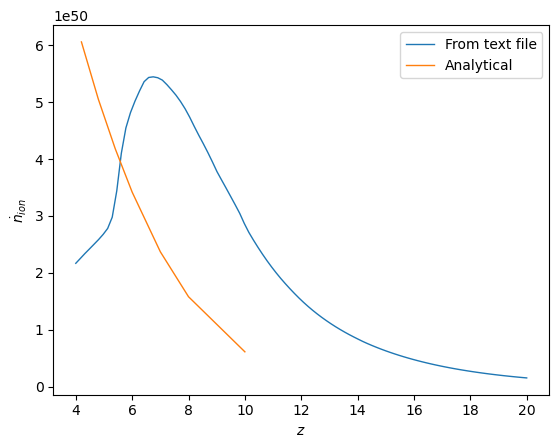

In [54]:
textdata = np.loadtxt('Data.nosync/Ndotion data/nion_kulkarni.txt')
zarr_text = textdata[:, 0]
nion_text = textdata[:, 1]

zarr_analytical = np.array([4.200, 4.800, 5.400, 6.000, 7.000, 8.000, 10.000])
nion_analytical = nionarr
dmm = 'lambda'

nionarr = np.zeros_like(zarr)
for i, z in enumerate(zarr):
    filename = f'Data.nosync/planck1_20_1024_{dmm}/halolist_z{z:.3f}.dat'
    
    #region Open data
    readdata = open(filename,"rb")

    # Read in data
    ngroups = np.fromfile(readdata,dtype=np.int32,count=1)  # number of FoF groups (haloes)

    CMx    = np.fromfile(readdata, dtype=np.float32, count=ngroups[0]) # x-coordinate halo centre of mass, comoving kpc/h
    CMy    = np.fromfile(readdata, dtype=np.float32, count=ngroups[0]) # y-coordinate halo centre of mass, comoving kpc/h
    CMz    = np.fromfile(readdata, dtype=np.float32, count=ngroups[0]) # z-coordinate halo centre of mass, comoving kpc/h
    Mgas   = np.fromfile(readdata, dtype=np.float32, count=ngroups[0]) # gas mass, Msol/h
    Mdm    = np.fromfile(readdata, dtype=np.float32, count=ngroups[0]) # dark matter mass, Msol/h
    Mstars = np.fromfile(readdata, dtype=np.float32, count=ngroups[0]) # stellar mass, Msol/h

    readdata.close()
    #endregion

    # Calculate nion
    nionarr[i] = zetaout * np.sum(Mdm) / Lbox*Lbox*Lbox

plt.plot(zarr_text, nion_text, linewidth=1.0, label='From text file')
plt.plot(zarr_analytical, nion_analytical, linewidth=1.0, label='Analytical')
plt.xlabel('$z$')
plt.ylabel('$\\dot{n}_{ion}$')
plt.legend()
plt.show()

These two graphs look very different.

## Plotting ionisation curve for different density limits